In [3]:
import keras

keras.__version__

Using TensorFlow backend.


'2.0.8'

## 1.卷积网络

### 实例化一个小型的卷积神经网络

In [4]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 卷积神经网络接收形状为 (image_height, image_width, image_channels)
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary() # 查看cnn网络架构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 每个 Conv2D 层和 MaxPooling2D 层的输出都是一个形状为 (height, width,channels) 的 3D 张量
# 宽度和高度两个维度的尺寸通常会随着网络加深而变小。通道数量由传入 Conv2D 层的第一个参数所控制（ 32 或 64）

### 在卷积神经网络上添加分类器

In [7]:
# 将最后的输出张量［大小为 (3, 3, 64)］输入到一个密集连接分类器网络中，即 Dense 层的堆叠
# 这些分类器可以处理 1D 向量，而当前的输出是 3D 张量,将 3D 输出展平为 1D，然后在上面添加几个 Dense 层

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # 将 3D 输出展平为 1D
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### 在MNIST图像上训练卷积神经网络

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 卷积神经网络接收形状为 (image_height, image_width, image_channels)
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # 将 3D 输出展平为 1D
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/5
60000/60000 [==============================] - 68s - loss: 0.1736 - acc: 0.9450    
Epoch 2/5
60000/60000 [==============================] - 67s - loss: 0.0450 - acc: 0.9862    
Epoch 3/5
60000/60000 [==============================] - 69s - loss: 0.0313 - acc: 0.9902    
Epoch 4/5
60000/60000 [==============================] - 79s - loss: 0.0242 - acc: 0.9926    
Epoch 5/5
60000/60000 [==============================] - 77s - loss: 0.0200 - acc: 0.9940    


In [10]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)

 9952/10000 [============================>.] - ETA: 0s

In [11]:
test_acc

0.99180000000000001

### 在小型数据集上从头开始训练一个卷积神经网络---------猫狗大战分类

In [12]:
import os
import shutil


PROJECT_ROOT_DIR = '.'


def find_data(path):
    if os.path.exists(path) is False:
        os.makedirs(path)

        
# 训练集有1000张猫的图片，1000张狗的图片
train_cats_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/train_dir/train_cats_dir')
find_data(train_cats_path)

train_dogs_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/train_dir/train_dogs_dir')
find_data(train_dogs_path)

# 验证集有500张猫的图片，500张狗的图片
validation_cats_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/validation_dir/validation_cats_dir')
find_data(validation_cats_path)

validation_dogs_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/validation_dir/validation_dogs_dir')
find_data(validation_dogs_path)


# 测试集有500张猫的图片，500张狗的图片
test_cats_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/test_dir/test_cats_dir')
find_data(test_cats_path)

test_dogs_path = os.path.join(PROJECT_ROOT_DIR, 'datasets/test_dir/test_dogs_dir')
find_data(test_dogs_path)


# 将前1000张猫的图片复制到train_cats_dir文件目录下------训练集
filenames = ["cat.{}.jpg".format(i) for i in range(1000)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/train_dir/train_cats_dir/', filename)
    shutil.copyfile(src, dst)

# 将前1000张狗的图片复制到train_dogs_dir文件目录下------训练集
filenames = ["dog.{}.jpg".format(i) for i in range(1000)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/train_dir/train_dogs_dir/', filename)
    shutil.copyfile(src, dst)

In [13]:
# 将500张猫的图片复制到validation_cats_dir文件目录下----验证集
filenames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/validation_dir/validation_cats_dir/', filename)
    shutil.copyfile(src, dst)
    
# 将500张狗的图片复制到validation_dogs_dir文件目录下----验证集
filenames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/validation_dir/validation_dogs_dir/', filename)
    shutil.copyfile(src, dst)

In [14]:
# 将500张猫的图片复制到test_cats_dir文件目录下----测试集
filenames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/test_dir/test_cats_dir/', filename)
    shutil.copyfile(src, dst)

# 将500张狗的图片复制到test_dogs_dir文件目录下----测试集
filenames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join(PROJECT_ROOT_DIR, 'datasets/train/', filename)
    dst = os.path.join(PROJECT_ROOT_DIR, 'datasets/test_dir/test_dogs_dir/', filename)
    shutil.copyfile(src, dst)

In [15]:
print('训练集猫的大小：', len(os.listdir(train_cats_path)))
print('训练集狗的大小：', len(os.listdir(train_dogs_path)))
print('验证集猫的大小：', len(os.listdir(validation_cats_path)))
print('验证集狗的大小：', len(os.listdir(validation_dogs_path)))
print('测试集猫的大小：', len(os.listdir(test_cats_path)))
print('测试集狗的大小：', len(os.listdir(test_dogs_path)))

训练集猫的大小： 1000
训练集狗的大小： 1000
验证集猫的大小： 500
验证集狗的大小： 500
测试集猫的大小： 500
测试集狗的大小： 500


In [16]:
from keras import layers
from keras import models

# 模型搭建
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)             0         
__________

In [18]:
from keras import optimizers

# 模型编译
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [19]:
# 数据预处理

# 使用ImageDataGenerator从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('datasets/train_dir/', target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('datasets/validation_dir/', target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch的大小:', data_batch.shape)
    print('labels batch的大小:', labels_batch.shape)
    break

data batch的大小: (20, 150, 150, 3)
labels batch的大小: (20,)


In [21]:
# 利用批量生成器拟合模型

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)


Epoch 1/30
100/100 [==============================] - 189s - loss: 8.0307 - acc: 0.0110 - val_loss: 7.9712 - val_acc: 0.0010
Epoch 2/30
100/100 [==============================] - 189s - loss: 7.9792 - acc: 0.0025 - val_loss: 7.8755 - val_acc: 0.0020
Epoch 3/30
100/100 [==============================] - 171s - loss: 7.9632 - acc: 0.0025 - val_loss: 7.9712 - val_acc: 0.0000e+00
Epoch 4/30
100/100 [==============================] - 172s - loss: 7.9632 - acc: 0.0025 - val_loss: 8.0350 - val_acc: 0.0010
Epoch 5/30
100/100 [==============================] - 189s - loss: 7.9632 - acc: 0.0025 - val_loss: 7.7958 - val_acc: 0.0020
Epoch 6/30
100/100 [==============================] - 174s - loss: 7.9951 - acc: 0.0025 - val_loss: 7.9712 - val_acc: 0.0010
Epoch 7/30
100/100 [==============================] - 185s - loss: 7.9473 - acc: 0.0025 - val_loss: 7.9234 - val_acc: 0.0020
Epoch 8/30
100/100 [==============================] - 176s - loss: 7.9632 - acc: 0.0025 - val_loss: 8.0509 - val_acc: 0.0

In [23]:
# 保存模型
import h5py

model.save('save_cats_and_dogs_model.h5')

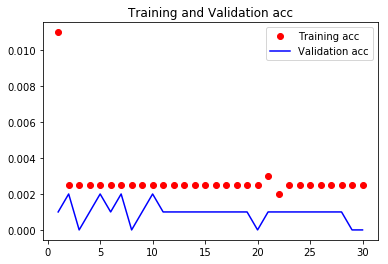

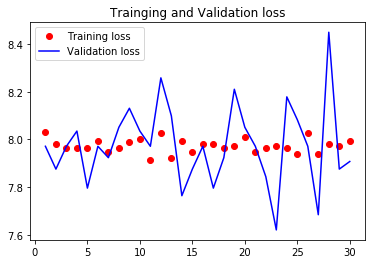

In [26]:
# 绘制训练过程中的损失曲线和精度曲线

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend();

In [ ]:
# 使用数据增强技术  data augment

